In [2]:
from backtesting import Backtest, Strategy
from backtesting.test import GOOG
from backtesting.lib import crossover
import talib as tl
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\James\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Define the RSI strategy
class RSI(Strategy):
    # Default parameter values
    upper_bound = 70
    lower_bound = 30
    window = 14

    def init(self):
        # Calculate RSI using talib
        self.rsi = self.I(tl.RSI, self.data.Close, self.window)

    def next(self):
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy()

In [4]:
# Create a Backtest object with the RSI strategy and data
bt = Backtest(GOOG, RSI, cash=1_000_000)
result = bt.run()
# Perform parameter optimization using the bt.optimize() function
optimized_result = bt.optimize(
    upper_bound = range(70, 91, 2),
    lower_bound = range(10, 31, 2),
    window = range(9, 15, 1),
    maximize = 'Return [%]'
)






C:\Users\James\AppData\Roaming\Python\Python39\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 726 configurations.
  output = _optimize_grid()


In [5]:
print(result['Return [%]'])
print(optimized_result['Return [%]'])

58.150622
365.04529399999996


In [66]:
ls = str(bt._results._strategy)
ls = [char for char in ls]
print(ls)



['R', 'S', 'I', '(', 'u', 'p', 'p', 'e', 'r', '_', 'b', 'o', 'u', 'n', 'd', '=', '9', '0', ',', 'l', 'o', 'w', 'e', 'r', '_', 'b', 'o', 'u', 'n', 'd', '=', '3', '0', ',', 'w', 'i', 'n', 'd', 'o', 'w', '=', '1', '0', ')']


In [67]:
y = [x for x in ls if x.isdigit()]
print(y)

['9', '0', '3', '0', '1', '0']


Text(0.5, 0, 'Year')

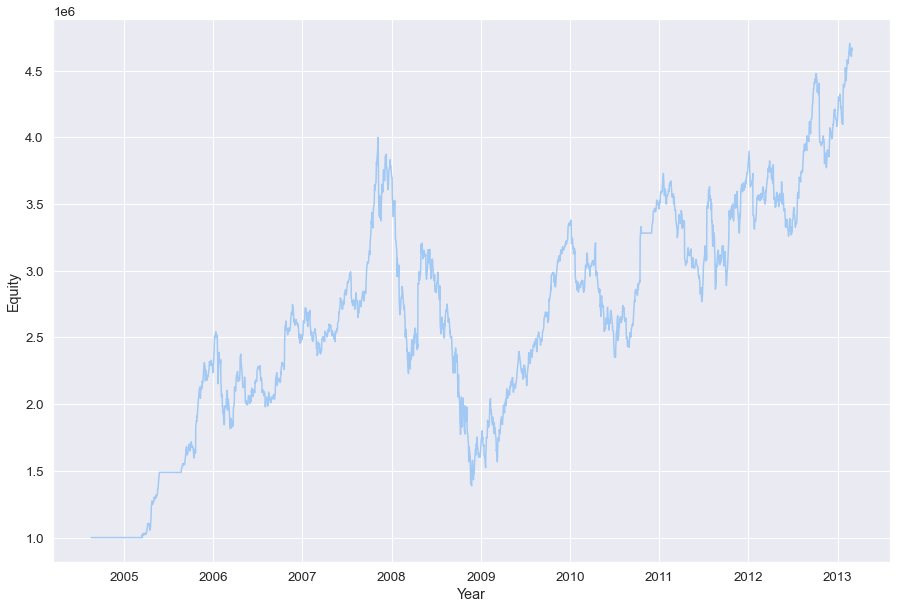

In [122]:
df = optimized_result['_equity_curve'].iloc[:,0:1]
plt.figure(figsize=(15,10))

# Set the text color to white
ax = sns.lineplot(data=df, x=df.index, y='Equity')
ax.set_xlabel('Year')
